In [1]:
import numpy as np
from scipy import signal
import seaborn as sns
import librosa
import madmom
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib import ticker
import pandas as pd
import re

In [2]:
# %matplotlib notebook
%matplotlib inline
sns.set_theme(context='paper', font="Times New Roman", font_scale=.9)
#sns.set_theme(context='talk')

colors = sns.color_palette("Blues", as_cmap=True)

In [3]:
########################################################
# Data section
########################################################


# F-Scores (Global Topology)
glb_f_scores_1x1 =   [0.8303218520609824, 0.7650876054510058, 0.7429479539133889, 0.8157758173326414, 0.8090386624869383, 0.8159371492704826, 0.8285317598056231, 0.7262816735415439]
glb_f_scores_1x3 =   [0.8592280701754387, 0.8426623897353649, 0.8213323065075087, 0.8572384937238493, 0.8527427771414026, 0.8761834044922963, 0.8814789219073946, 0.7921071176885129]
glb_f_scores_1x5 =   [0.8686440677966102, 0.8362810319649521, 0.8291716210860087, 0.8688692098092643, 0.8543987706492508, 0.8692123224497326, 0.8862731521550977, 0.7998306041784303]
glb_f_scores_1x7 =   [0.8695041438404271, 0.8331459771960816, 0.8291239147592739, 0.8721652948093398, 0.8490661282180716, 0.8710980536173338, 0.8785947993800586, 0.8040370058873003]
glb_f_scores_1x9 =   [0.8715194346289752, 0.8282315622521809, 0.8316911321134124, 0.8724307796840497, 0.8538952745849298, 0.8716626772233474, 0.8779318609827085, 0.8061884669479608]
glb_f_scores_1x11 =  [0.8673412029229906, 0.8276305220883535, 0.8332679482149862, 0.8713579826205486, 0.8502781992918562, 0.8629238060517682, 0.8831213475421108, 0.8034429236630449]
glb_f_scores_1x13 =  [0.8671841919548341, 0.8230174081237912, 0.8263327948303716, 0.8749152542372882, 0.8427640822582705, 0.8683379758588673, 0.8788395904436861, 0.8090297251822771]

glb_f_scores_3x1 =   [0.8314257453723329, 0.7641185136683583, 0.7429367290091525, 0.8153659802734037, 0.8087659796504043, 0.8166697813492806, 0.8294882914137033, 0.7262536873156341]
glb_f_scores_3x3 =   [0.863802302723954, 0.8444300097434232, 0.8252714708785784, 0.8613778002358093, 0.8583979328165374, 0.8795811518324607, 0.8813559322033898, 0.7896311066799601]
glb_f_scores_3x5 =   [0.8692101928762496, 0.8408908828713347, 0.8315830416180475, 0.872739563968227, 0.858898847631242, 0.8724782528225061, 0.886254295532646, 0.8101018557276406]
glb_f_scores_3x7 =   [0.8703756001129626, 0.834875791524598, 0.8330051201260339, 0.8772819472616634, 0.8591188524590164, 0.8640000000000001, 0.8830721542965387, 0.8103954170741932]
glb_f_scores_3x9 =   [0.869283804699592, 0.8237956676365987, 0.8300846623351053, 0.8809563899646404, 0.8572153826627744, 0.8672760511882998, 0.8842608398770913, 0.8097109177659276]
glb_f_scores_3x11 =  [0.8742921857304642, 0.8276530447423679, 0.8229001584786054, 0.8802852776362711, 0.8534493792397286, 0.8569335043048177, 0.8781985670419651, 0.8115007012622723]
glb_f_scores_3x13 =  [0.8661882650907555, 0.8201923076923077, 0.8213031603589543, 0.8765537204154606, 0.8553104155977425, 0.8571952337305225, 0.882687338501292, 0.8059325591157129]

glb_f_scores_5x1 =   [0.829579260518487, 0.7657291497317509, 0.7436765584544911, 0.8160581415469804, 0.8092998955067922, 0.8163799551234106, 0.8297428769979153, 0.7257446181067533]
glb_f_scores_5x3 =   [0.8597501052927138, 0.8376012965964343, 0.8258492776259273, 0.8574770258980786, 0.8605588044184534, 0.877271875585535, 0.882668049075514, 0.7933276788238621]
glb_f_scores_5x5 =   [0.8671507902605724, 0.8361747036856633, 0.8319591676482136, 0.8725933366817344, 0.8559429880376688, 0.8680632120543919, 0.8852010265183917, 0.7993230856014667]
glb_f_scores_5x7 =   [0.8684800897363992, 0.8381954407779372, 0.8335949764521193, 0.8751478290251732, 0.8594725442731559, 0.8664830119375574, 0.8842820730671198, 0.8079954954954954]
glb_f_scores_5x9 =   [0.8697836706210748, 0.827430779137154, 0.8312512393416617, 0.875753516409913, 0.8575472912109123, 0.874837269853078, 0.8882040746447527, 0.8102149037119731]
glb_f_scores_5x11 =  [0.870289343683839, 0.8296343605300973, 0.8248874975542947, 0.8739495798319328, 0.8465828037867981, 0.864954128440367, 0.885161731986993, 0.8186972756188632]
glb_f_scores_5x13 =  [0.8681863230921704, 0.8188204541741545, 0.8302554027504911, 0.8810975609756098, 0.8529753452949528, 0.8562031792435593, 0.8861283643892339, 0.8158404873996123]

glb_f_scores_7x1 =   [0.8310954063604241, 0.7644927536231885, 0.7415953849214244, 0.814236111111111, 0.8085161964472309, 0.8159222575219585, 0.8287849817486529, 0.7251548215865526]
glb_f_scores_7x3 =   [0.8604324627913507, 0.8424967658473481, 0.8240906380441265, 0.8571428571428572, 0.8631660631143301, 0.8754646840148699, 0.8820459290187891, 0.797358646306232]
glb_f_scores_7x5 =   [0.8681843732433953, 0.8408650742414461, 0.8288006261005675, 0.8711573996304385, 0.8599021375225342, 0.8627665390924003, 0.8838886980419101, 0.8054260279779568]
glb_f_scores_7x7 =   [0.8691261046430074, 0.8355726167626361, 0.8255137650252036, 0.8739071956960323, 0.8523627075351213, 0.8601297764960347, 0.8789464798244133, 0.8075903446351334]
glb_f_scores_7x9 =   [0.8651513038627806, 0.836352081347315, 0.8283227848101267, 0.8753315649867374, 0.8557937723328227, 0.8609174311926605, 0.8797108931337119, 0.8120050020842017]
glb_f_scores_7x11 =  [0.8684771790132234, 0.8284345047923323, 0.8248496993987976, 0.8725687458081823, 0.8448407643312102, 0.8581844695588771, 0.8878969957081546, 0.8164164715603912]
glb_f_scores_7x13 =  [0.8713903366671363, 0.8242093433938031, 0.8126225009800078, 0.862882973380211, 0.8347128166541259, 0.8431124751760246, 0.8731573534453206, 0.7985659274996681]

glb_f_scores_9x1 =   [0.8304869442484122, 0.7637666992505702, 0.7446424994992992, 0.8139575056140957, 0.8072669826224328, 0.8150224215246638, 0.8300561797752809, 0.7232909144717372]
glb_f_scores_9x3 =   [0.8606384474757417, 0.8365400161681487, 0.8243797616722016, 0.8509529239289786, 0.8566666666666667, 0.8747433264887065, 0.8833216538192012, 0.7913729912602199]
glb_f_scores_9x5 =   [0.8613016095171449, 0.8382141142582814, 0.8017107309486781, 0.8673858921161824, 0.8534005037783375, 0.8667287977632806, 0.8853083853083853, 0.8110061145080601]
glb_f_scores_9x7 =   [0.8636490639843531, 0.8281049935979513, 0.8217023786121486, 0.8769801145938658, 0.8532892225473979, 0.8573494847224732, 0.8825659596482153, 0.8106081643987781]
glb_f_scores_9x9 =   [0.8453461975028377, 0.8089708923174805, 0.8037937166567872, 0.863788487282463, 0.8374634642267125, 0.8343579834884947, 0.8710006807351941, 0.8129458388375166]
glb_f_scores_9x11 =  [0.8623259738433414, 0.8281025967819021, 0.791993720565149, 0.8625608323544219, 0.8346296060181053, 0.8309859154929576, 0.8736499228527345, 0.8164556962025318]
glb_f_scores_9x13 =  [0.8575795470334862, 0.8297972654408298, 0.8046995377503852, 0.8656864364777795, 0.8471559396362698, 0.8561631474463093, 0.8717948717948719, 0.8106995884773662]

glb_f_scores_11x1 =  [0.8294694922486133, 0.7644356955380577, 0.7414614773629865, 0.8152777777777778, 0.8079820272234703, 0.8191307648510153, 0.8271562175268445, 0.7280971186192774]
glb_f_scores_11x3 =  [0.8578644590992002, 0.8429912593072191, 0.820763956904995, 0.8507560815253122, 0.8608978529603123, 0.8735760971055089, 0.8796521739130436, 0.7924421082540135]
glb_f_scores_11x5 =  [0.8601240834743373, 0.8354349561053471, 0.8191072826938137, 0.8654459936166639, 0.8473976755937344, 0.8480085729594571, 0.8867859600825878, 0.8014705882352942]
glb_f_scores_11x7 =  [0.8627780109106169, 0.8216908892014376, 0.830009871668312, 0.8719594594594593, 0.8425368353619475, 0.8598749540272159, 0.8824636441402909, 0.8102592388306673]
glb_f_scores_11x9 =  [0.8635602678571429, 0.811700767263427, 0.8044151820294345, 0.8615791212421539, 0.8463870641738253, 0.8644098810612992, 0.8718909710391822, 0.81793254729915]
glb_f_scores_11x11 = [0.8457335014712064, 0.8162102263732784, 0.7913725490196079, 0.8689905831818933, 0.8422649140546006, 0.8166786484543493, 0.8671729957805907, 0.8162387417663665]
glb_f_scores_11x13 = [0.8591133004926109, 0.8155884645362432, 0.8175210405508799, 0.8761776581426649, 0.8403511003689098, 0.8519195612431444, 0.8626187245590231, 0.8124145474432596]



# F-Scores (Ring Topology, k=3 neighbours)
loc_f_scores_1x1 =   [0.8302046577275934, 0.7650876054510058, 0.7430955692429962, 0.8157758173326414, 0.8088830829523187, 0.8159371492704826, 0.8285317598056231, 0.7262816735415439]
loc_f_scores_1x3 =   [0.8580931263858093, 0.8443202367253001, 0.823529411764706, 0.8533916849015316, 0.8495803744351194, 0.8761061946902655, 0.8758526603001364, 0.7923681257014591]
loc_f_scores_1x5 =   [0.8676182479708929, 0.8285396472270777, 0.8310648518815051, 0.8690890990542559, 0.8432835820895522, 0.8655034532897128, 0.8767860144562111, 0.8002820874471086]
loc_f_scores_1x7 =   [0.8723495090365733, 0.8317911434236616, 0.8235064427957829, 0.8714670255720055, 0.8503507404520655, 0.8708898383800855, 0.8817278025368529, 0.7975442604226156]
loc_f_scores_1x9 =   [0.8678062678062679, 0.8257600523046748, 0.8280131553491971, 0.8720989327460613, 0.8443993917891537, 0.8638772154211584, 0.8798901853122856, 0.7962589928057553]
loc_f_scores_1x11 =  [0.8669744020142677, 0.8254428341384862, 0.8283303904257406, 0.8725642352129677, 0.8504158669225848, 0.8715852072105557, 0.8783309957924265, 0.8120405049243999]
loc_f_scores_1x13 =  [0.8625523919641567, 0.8198051948051949, 0.815914489311164, 0.8698214595250476, 0.8356077030990946, 0.8493899107630667, 0.8745337402509326, 0.8086350974930363]

loc_f_scores_3x1 =   [0.8295983086680762, 0.7607790910604294, 0.7434014685453463, 0.8124560168895144, 0.8091443500979753, 0.8166542195668409, 0.8289542369932139, 0.728338953232664]
loc_f_scores_3x3 =   [0.8446002805049088, 0.8429319371727749, 0.7977505523197428, 0.8544474393530999, 0.8528330586893141, 0.868222753170373, 0.8704663212435234, 0.7905202941977663]
loc_f_scores_3x5 =   [0.8620353612696645, 0.8242258652094717, 0.7849366410851328, 0.8135979180221211, 0.8458999746128459, 0.8642517380168313, 0.8663173905695455, 0.7740645529848614]
loc_f_scores_3x7 =   [0.8626567122129877, 0.840470588235294, 0.8232530827950676, 0.8743188010899182, 0.838424640242363, 0.8554975706316358, 0.8745091343691309, 0.7782963827304551]
loc_f_scores_3x9 =   [0.831647498960787, 0.8148271276595744, 0.78878303073881, 0.8471691559569295, 0.8426421831165518, 0.870324662996013, 0.8581780538302277, 0.7954450770726288]
loc_f_scores_3x11 =  [0.8682499293186317, 0.8045335085413928, 0.8172942817294282, 0.8598130841121495, 0.8338275106355549, 0.8218988218988218, 0.8603863097255168, 0.8193418401611821]
loc_f_scores_3x13 =  [0.8523823443437593, 0.8210967935271202, 0.7595396729254997, 0.8511551155115512, 0.7844595460956533, 0.8707216898102875, 0.8676268861454046, 0.8021538036725113]

loc_f_scores_5x1 =   [0.828684136376444, 0.7636304276852759, 0.7413385826771653, 0.8128096249115356, 0.8078226857887875, 0.8166167664670658, 0.8287944492627928, 0.7248560035445281]
loc_f_scores_5x3 =   [0.8481631512781114, 0.843508997429306, 0.8033718878651245, 0.8505403158769742, 0.846047505341209, 0.8358371040723982, 0.8736806264896152, 0.7929428369795343]
loc_f_scores_5x5 =   [0.8530555555555555, 0.8245529241179315, 0.7680440771349862, 0.7780265711300194, 0.8326769152585439, 0.8695019992729917, 0.8230622617534944, 0.7826795167639473]
loc_f_scores_5x7 =   [0.8452461684524617, 0.7972387221062771, 0.7783515012430675, 0.8380952380952381, 0.8081796512357297, 0.7926527728717768, 0.8238866396761133, 0.7939101373932417]
loc_f_scores_5x9 =   [0.8271186440677967, 0.7701883179061604, 0.747385358004827, 0.8308970099667775, 0.7968000000000001, 0.7938504542278128, 0.8303201194227898, 0.7664092664092664]
loc_f_scores_5x11 =  [0.8132605958875366, 0.7837998808814771, 0.738355376653249, 0.8203059337703815, 0.7944996180290298, 0.7774891774891776, 0.816072629455279, 0.7899758300470678]
loc_f_scores_5x13 =  [0.8243757934828608, 0.7916227211089347, 0.7700492610837439, 0.8317093311312964, 0.7973540262053174, 0.7916303400174368, 0.8154821488154821, 0.7860330795484378]

loc_f_scores_7x1 =   [0.8291166077738515, 0.7654759980604494, 0.7426076602500497, 0.8130939809926083, 0.8092561119100536, 0.8159371492704826, 0.8293273387515132, 0.7285505124450952]
loc_f_scores_7x3 =   [0.8404771267531786, 0.7963816956367507, 0.6996799096215403, 0.8331765443712763, 0.8500390523301223, 0.8713724021718778, 0.8373806732540613, 0.7660297239915074]
loc_f_scores_7x5 =   [0.8200598375837015, 0.8003152088258472, 0.6998401278976819, 0.7894060995184591, 0.7931982995748937, 0.7614957953122206, 0.7557692307692307, 0.756313460036449]
loc_f_scores_7x7 =   [0.7976802425201002, 0.7865305500533293, 0.7400932400932401, 0.7938009787928222, 0.8094519859225742, 0.7751229796205199, 0.8027947598253274, 0.7776736715299156]
loc_f_scores_7x9 =   [0.8108258928571428, 0.7704758821625122, 0.7589823266653719, 0.819509064655864, 0.7956005931784478, 0.7781175671083927, 0.8227264971847807, 0.7821461009471908]
loc_f_scores_7x11 =  [0.817647901446784, 0.7770460959548448, 0.7412474849094567, 0.8308264323136725, 0.8003116073747079, 0.7695231513476157, 0.8525663107130554, 0.7738079771339482]
loc_f_scores_7x13 =  [0.8106439282563952, 0.7516178736517719, 0.7244618395303327, 0.8224115334207077, 0.7929194325133411, 0.7532510836945648, 0.8098846787479407, 0.7770374167093796]

loc_f_scores_9x1 =   [0.8288930047015244, 0.7644951140065147, 0.744408945686901, 0.8147120055517002, 0.8092319728778199, 0.8147179678744864, 0.8294722173837311, 0.7274331079094384]
loc_f_scores_9x3 =   [0.8440570084405701, 0.7857705021249802, 0.7731182795698924, 0.8383838383838383, 0.8507206135131561, 0.8798486281929989, 0.8624070317782286, 0.7671194114318053]
loc_f_scores_9x5 =   [0.8017904602042243, 0.7630683575626354, 0.7067669172932332, 0.8130641720006565, 0.7975227502527804, 0.767719298245614, 0.7998672419515434, 0.7726743433820674]
loc_f_scores_9x7 =   [0.7991002389990158, 0.7602184345523747, 0.7069359756097561, 0.8135818908122504, 0.7878787878787878, 0.7904109589041096, 0.795677136102668, 0.7608171551833525]
loc_f_scores_9x9 =   [0.811586051743532, 0.7525067642845774, 0.7040063783137332, 0.8197664579455068, 0.7859169460923394, 0.7844535567837405, 0.807495741056218, 0.779625507398193]
loc_f_scores_9x11 =  [0.8215955788578717, 0.7361312108055957, 0.7343597739232117, 0.8285055957867019, 0.7891891891891892, 0.7747716698259522, 0.8177356020942409, 0.7772486772486773]
loc_f_scores_9x13 =  [0.8070725794952232, 0.752733801207769, 0.6937073540561031, 0.828671914252219, 0.7884565160616349, 0.7489148580968281, 0.8268879668049792, 0.7759436980166348]

loc_f_scores_11x1 =  [0.8301136363636364, 0.7631360848665671, 0.7422845691382766, 0.816637781629116, 0.8098078197481775, 0.8153558052434458, 0.8307692307692307, 0.7208197208197208]
loc_f_scores_11x3 =  [0.7801398601398601, 0.8132372214941023, 0.6916437098255279, 0.7875150060024009, 0.7986939595629787, 0.7599584343609284, 0.7802369077306733, 0.748024355486462]
loc_f_scores_11x5 =  [0.8050296693981351, 0.7606918238993712, 0.7208255159474671, 0.8078994614003592, 0.8004529441368899, 0.7944963838419474, 0.8230201987816608, 0.761904761904762]
loc_f_scores_11x7 =  [0.7946301056840903, 0.7406179351921627, 0.7044917257683216, 0.8087248322147652, 0.7820625549554077, 0.7530562347188264, 0.805477643953143, 0.7736749560411957]
loc_f_scores_11x9 =  [0.8145092460881935, 0.7475965455434251, 0.6688646198227901, 0.8264656616415411, 0.7916879143294238, 0.7678571428571429, 0.8333035554761481, 0.7754695857693743]
loc_f_scores_11x11 = [0.8093519988454323, 0.7753984865561102, 0.7142857142857143, 0.844406779661017, 0.7928616953473551, 0.7545980031529164, 0.8096774193548387, 0.7630319818685469]
loc_f_scores_11x13 = [0.8042895442359249, 0.7657770800627944, 0.6933696286214271, 0.8289164709828918, 0.784149892391442, 0.7610619469026548, 0.8112244897959182, 0.768460881240083]

In [4]:
# Calculate means (Global data)
g_mean_1x1   = 100*np.mean(glb_f_scores_1x1)
g_mean_1x3   = 100*np.mean(glb_f_scores_1x3)
g_mean_1x5   = 100*np.mean(glb_f_scores_1x5)
g_mean_1x7   = 100*np.mean(glb_f_scores_1x7)
g_mean_1x9   = 100*np.mean(glb_f_scores_1x9)
g_mean_1x11  = 100*np.mean(glb_f_scores_1x11)
g_mean_1x13  = 100*np.mean(glb_f_scores_1x13)

g_mean_3x1   = 100*np.mean(glb_f_scores_3x1)
g_mean_3x3   = 100*np.mean(glb_f_scores_3x3)
g_mean_3x5   = 100*np.mean(glb_f_scores_3x5)
g_mean_3x7   = 100*np.mean(glb_f_scores_3x7)
g_mean_3x9   = 100*np.mean(glb_f_scores_3x9)
g_mean_3x11  = 100*np.mean(glb_f_scores_3x11)
g_mean_3x13  = 100*np.mean(glb_f_scores_3x13)

g_mean_5x1   = 100*np.mean(glb_f_scores_5x1)
g_mean_5x3   = 100*np.mean(glb_f_scores_5x3)
g_mean_5x5   = 100*np.mean(glb_f_scores_5x5)
g_mean_5x7   = 100*np.mean(glb_f_scores_5x7)
g_mean_5x9   = 100*np.mean(glb_f_scores_5x9)
g_mean_5x11  = 100*np.mean(glb_f_scores_5x11)
g_mean_5x13  = 100*np.mean(glb_f_scores_5x13)

g_mean_7x1   = 100*np.mean(glb_f_scores_7x1)
g_mean_7x3   = 100*np.mean(glb_f_scores_7x3)
g_mean_7x5   = 100*np.mean(glb_f_scores_7x5)
g_mean_7x7   = 100*np.mean(glb_f_scores_7x7)
g_mean_7x9   = 100*np.mean(glb_f_scores_7x9)
g_mean_7x11  = 100*np.mean(glb_f_scores_7x11)
g_mean_7x13  = 100*np.mean(glb_f_scores_7x13)

g_mean_9x1   = 100*np.mean(glb_f_scores_9x1) 
g_mean_9x3   = 100*np.mean(glb_f_scores_9x3) 
g_mean_9x5   = 100*np.mean(glb_f_scores_9x5)
g_mean_9x7   = 100*np.mean(glb_f_scores_9x7)
g_mean_9x9   = 100*np.mean(glb_f_scores_9x9)
g_mean_9x11  = 100*np.mean(glb_f_scores_9x11)
g_mean_9x13  = 100*np.mean(glb_f_scores_9x13)

g_mean_11x1  = 100*np.mean(glb_f_scores_11x1)
g_mean_11x3  = 100*np.mean(glb_f_scores_11x3)
g_mean_11x5  = 100*np.mean(glb_f_scores_11x5)
g_mean_11x7  = 100*np.mean(glb_f_scores_11x7)
g_mean_11x9  = 100*np.mean(glb_f_scores_11x9)
g_mean_11x11 = 100*np.mean(glb_f_scores_11x11)
g_mean_11x13 = 100*np.mean(glb_f_scores_11x13)

g_data = {
    "1":  [g_mean_1x3, g_mean_1x5, g_mean_1x7, g_mean_1x9, g_mean_1x11, g_mean_1x13],
    "3":  [g_mean_3x3, g_mean_3x5, g_mean_3x7, g_mean_3x9, g_mean_3x11, g_mean_3x13],
    "5":  [g_mean_5x3, g_mean_5x5, g_mean_5x7, g_mean_5x9, g_mean_5x11, g_mean_5x13],
    "7":  [g_mean_7x3, g_mean_7x5, g_mean_7x7, g_mean_7x9, g_mean_7x11, g_mean_7x13],
    "9":  [g_mean_9x3, g_mean_9x5, g_mean_9x7, g_mean_9x9, g_mean_9x11, g_mean_9x13],
    "11": [g_mean_11x3, g_mean_11x5, g_mean_11x7, g_mean_11x9, g_mean_11x11, g_mean_11x13],
}

g_df = pd.DataFrame(g_data, index = ["3", "5", "7", "9", "11", "13"])

print(g_df) 

            1          3          5          7          9         11
3   84.787169  85.048096  84.931301  85.027476  84.732697  84.736800
5   85.158510  85.526962  85.205104  85.262386  84.813202  84.547189
7   85.084191  85.401561  85.420643  85.039362  84.928117  84.769661
9   85.169390  85.282296  85.437784  85.169810  83.470841  84.273448
11  84.992049  85.065160  85.176959  85.020860  83.758803  83.308277
13  84.880263  84.817038  85.118839  84.008172  84.294704  84.196305


In [5]:
# Calculate means
l_mean_1x1   = 100*np.mean(loc_f_scores_1x1)
l_mean_1x3   = 100*np.mean(loc_f_scores_1x3)
l_mean_1x5   = 100*np.mean(loc_f_scores_1x5)
l_mean_1x7   = 100*np.mean(loc_f_scores_1x7)
l_mean_1x9   = 100*np.mean(loc_f_scores_1x9)
l_mean_1x11  = 100*np.mean(loc_f_scores_1x11)
l_mean_1x13  = 100*np.mean(loc_f_scores_1x13)

l_mean_3x1   = 100*np.mean(loc_f_scores_3x1)
l_mean_3x3   = 100*np.mean(loc_f_scores_3x3)
l_mean_3x5   = 100*np.mean(loc_f_scores_3x5)
l_mean_3x7   = 100*np.mean(loc_f_scores_3x7)
l_mean_3x9   = 100*np.mean(loc_f_scores_3x9)
l_mean_3x11  = 100*np.mean(loc_f_scores_3x11)
l_mean_3x13  = 100*np.mean(loc_f_scores_3x13)

l_mean_5x1   = 100*np.mean(loc_f_scores_5x1)
l_mean_5x3   = 100*np.mean(loc_f_scores_5x3)
l_mean_5x5   = 100*np.mean(loc_f_scores_5x5)
l_mean_5x7   = 100*np.mean(loc_f_scores_5x7)
l_mean_5x9   = 100*np.mean(loc_f_scores_5x9)
l_mean_5x11  = 100*np.mean(loc_f_scores_5x11)
l_mean_5x13  = 100*np.mean(loc_f_scores_5x13)

l_mean_7x1   = 100*np.mean(loc_f_scores_7x1)
l_mean_7x3   = 100*np.mean(loc_f_scores_7x3)
l_mean_7x5   = 100*np.mean(loc_f_scores_7x5)
l_mean_7x7   = 100*np.mean(loc_f_scores_7x7)
l_mean_7x9   = 100*np.mean(loc_f_scores_7x9)
l_mean_7x11  = 100*np.mean(loc_f_scores_7x11)
l_mean_7x13  = 100*np.mean(loc_f_scores_7x13)

l_mean_9x1   = 100*np.mean(loc_f_scores_9x1) 
l_mean_9x3   = 100*np.mean(loc_f_scores_9x3) 
l_mean_9x5   = 100*np.mean(loc_f_scores_9x5)
l_mean_9x7   = 100*np.mean(loc_f_scores_9x7)
l_mean_9x9   = 100*np.mean(loc_f_scores_9x9)
l_mean_9x11  = 100*np.mean(loc_f_scores_9x11)
l_mean_9x13  = 100*np.mean(loc_f_scores_9x13)

l_mean_11x1  = 100*np.mean(loc_f_scores_11x1)
l_mean_11x3  = 100*np.mean(loc_f_scores_11x3)
l_mean_11x5  = 100*np.mean(loc_f_scores_11x5)
l_mean_11x7  = 100*np.mean(loc_f_scores_11x7)
l_mean_11x9  = 100*np.mean(loc_f_scores_11x9)
l_mean_11x11 = 100*np.mean(loc_f_scores_11x11)
l_mean_11x13 = 100*np.mean(loc_f_scores_11x13)

l_data = {
    "1":  [l_mean_1x3,  l_mean_1x5,  l_mean_1x7,  l_mean_1x9,  l_mean_1x11,  l_mean_1x13],
    "3":  [l_mean_3x3,  l_mean_3x5,  l_mean_3x7,  l_mean_3x9,  l_mean_3x11,  l_mean_3x13],
    "5":  [l_mean_5x3,  l_mean_5x5,  l_mean_5x7,  l_mean_5x9,  l_mean_5x11,  l_mean_5x13],
    "7":  [l_mean_7x3,  l_mean_7x5,  l_mean_7x7,  l_mean_7x9,  l_mean_7x11,  l_mean_7x13],
    "9":  [l_mean_9x3,  l_mean_9x5,  l_mean_9x7,  l_mean_9x9,  l_mean_9x11,  l_mean_9x13],
    "11": [l_mean_11x3, l_mean_11x5, l_mean_11x7, l_mean_11x9, l_mean_11x11, l_mean_11x13],
}

l_df = pd.DataFrame(l_data, index = ["3", "5", "7", "9", "11", "13"])

print(l_df) 

            1          3          5          7          9         11
3   84.665523  84.022158  83.676155  81.181714  82.517816  76.993118
5   84.777087  82.941618  81.644998  77.204976  77.780919  78.429009
7   84.995335  84.342836  80.969510  78.539355  77.682757  77.034200
9   84.726302  83.112710  79.537115  79.229799  78.066968  77.821928
11  85.071055  83.566816  79.171988  79.537212  78.494216  78.295151
13  84.203250  82.614198  80.103209  78.027847  77.779859  77.715624


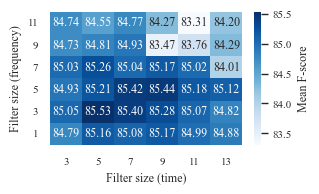

In [22]:
# Plot Global Heatmap
fig, axs = plt.subplots(figsize=(3.25, 2))
#fig, axs = plt.subplots()
#sns.heatmap(data=g_df.T, ax=axs, rasterized=True, annot=True, cmap=colors, fmt=".2f", cbar_kws={'label': 'Mean F-score'}, xticklabels=1, yticklabels=1, vmin=83., vmax=85.6)
sns.heatmap(data=g_df.T, ax=axs, rasterized=True, annot=True, cmap=colors, fmt=".2f", cbar_kws={'label': 'Mean F-score'}, xticklabels=1, yticklabels=1)#, vmin=79., vmax=85.6)
axs.invert_yaxis()
axs.set_xlabel("Filter size (time)")
axs.set_ylabel("Filter size (frequency)")
axs.set_yticklabels(axs.get_yticklabels(), rotation=0)

#axs.set_title("F-Scores Heatmap (Global Topology)")

plt.savefig("heatmap_global.pdf", bbox_inches="tight")
plt.tight_layout()


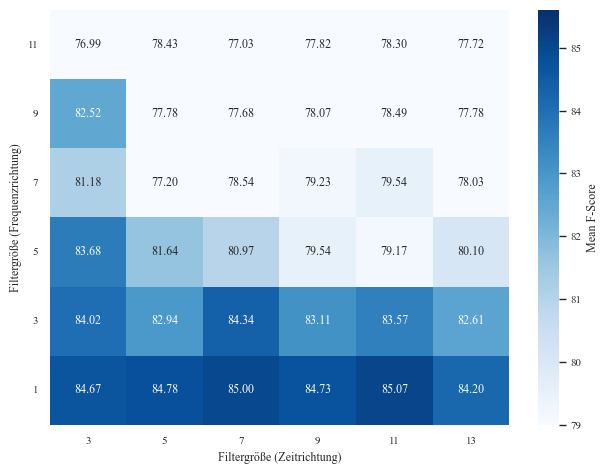

In [7]:
# Plot Local Heatmap
#fig, axs = plt.subplots(figsize=(6, 4))
fig, axs = plt.subplots()
sns.heatmap(data=l_df.T, ax=axs, cmap=colors, annot=True, fmt=".2f", cbar_kws={'label': 'Mean F-Score'}, xticklabels=1, yticklabels=1, vmin=79., vmax=85.6)
axs.invert_yaxis()
axs.set_xlabel("Filtergröße (Zeitrichtung)")
axs.set_ylabel("Filtergröße (Frequenzrichtung)")
axs.set_yticklabels(axs.get_yticklabels(), rotation=0)

#axs.set_title("F-Scores Heatmap (Ring Topology)")

#plt.savefig("heatmap_local_gleiche_skala.png", dpi=300, bbox_inches="tight")
plt.tight_layout()

In [8]:
# Auswertung des besten Ergebnisses:
# Filtertyp: Global 3x5, Länge Zeitrichtung: 5, Länge Frequenzrichtung: 3

filter1 = [ 1.4514875 ,  0.67962813,  1.3267739 ,  1.076459  ,  1.1447549 , -1.4494876 , 0.4485518 , -1.3983144,  12.780292 ]
filter2 = [ 0.4388686 ,  0.26955575,  0.44204888,  3.9786017 ,  1.6983291 , -2.8763483 , 1.0405272 , -4.2872205,  13.682718 ]
filter3 = [ 0.90074927,  2.0068014 ,  1.384222  ,  0.90909255,  1.429568  , -1.5369593 , 0.37383863, -1.3617892,  15.807245 ]
filter4 = [-0.5914803 , -0.35116303, -0.5254847 , -3.965828  ,  2.2166693 , -1.5370568 , 0.5555174 ,  3.1105368,  11.309557 ]
filter5 = [ 0.45256743,  1.0780698 ,  0.77992415,  2.171062  ,  0.98768353, -1.6954808 , 0.8178946 , -2.5986037,  14.437158 ]
filter6 = [-0.6369055 , -0.83030605, -0.52570707, -3.5917513 ,  2.562756  , -1.8627614 , 1.2491975 ,  1.9648478,  12.008744 ]
filter7 = [-0.34577784, -0.22609143, -0.32085896, -2.1855235 , -4.527265  , -0.41339868, 2.7202175 ,  4.980925 ,  14.5411005]
filter8 = [ 0.7999404 ,  1.8004252 ,  3.543838  ,  0.8375645 ,  0.12475213, -0.34295174, 0.23983702, -0.9645398,  14.424377 ]

def split_list(a_list, freqlength):
    return a_list[:freqlength], a_list[freqlength:-1]

freq1, time1 = split_list(filter1, 3)
freq2, time2 = split_list(filter2, 3)
freq3, time3 = split_list(filter3, 3)
freq4, time4 = split_list(filter4, 3)
freq5, time5 = split_list(filter5, 3)
freq6, time6 = split_list(filter6, 3)
freq7, time7 = split_list(filter7, 3)
freq8, time8 = split_list(filter8, 3)
thrshlds = [filter1[-1], filter2[-1], filter3[-1], filter4[-1], filter5[-1], filter6[-1], filter7[-1], filter8[-1]]

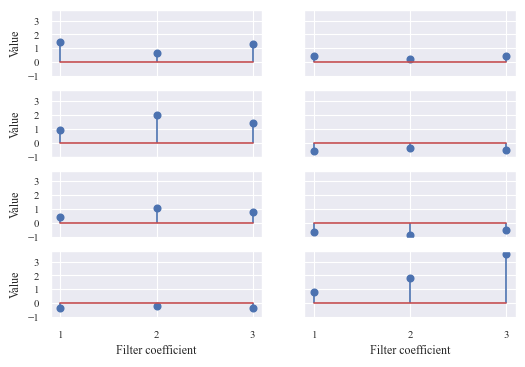

In [9]:
# Plot frequency filter kernels
fig, axs = plt.subplots(4, 2, sharex="all", sharey="all", figsize=(6, 4))
#fig.suptitle("Frequency Filters for (3x5)\nMean F1: "+str(np.round(g_mean_3x5,4)), fontsize="medium")
axs[0, 0].stem([x+1 for x in range(len(freq1))], freq1)
axs[0, 1].stem([x+1 for x in range(len(freq2))], freq2)
axs[1, 0].stem([x+1 for x in range(len(freq3))], freq3)
axs[1, 1].stem([x+1 for x in range(len(freq4))], freq4)
axs[2, 0].stem([x+1 for x in range(len(freq5))], freq5)
axs[2, 1].stem([x+1 for x in range(len(freq6))], freq6)
axs[3, 0].stem([x+1 for x in range(len(freq7))], freq7)
axs[3, 1].stem([x+1 for x in range(len(freq8))], freq8)

for ax in axs.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set(xlabel='Filter coefficient', ylabel='Value')
    ax.label_outer()

#plt.savefig("3x5_freq_filters.png", dpi=300, bbox_inches="tight")

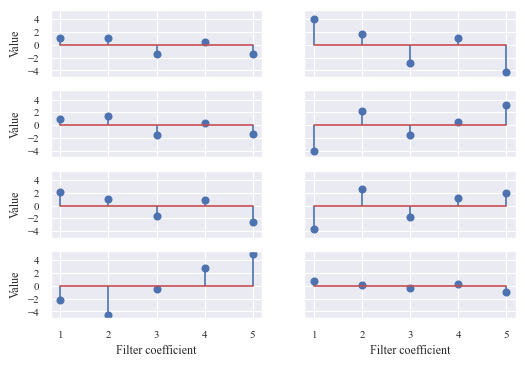

In [10]:
# Plot time filter kernels
fig, axs = plt.subplots(4, 2, sharex="all", sharey="all", figsize=(6, 4))
#fig.suptitle("Time Filters for (3x5)\nMean F1: "+str(np.round(g_mean_3x5,4)), fontsize="medium")
axs[0, 0].stem([x+1 for x in range(len(time1))], time1)
axs[0, 1].stem([x+1 for x in range(len(time2))], time2)
axs[1, 0].stem([x+1 for x in range(len(time3))], time3)
axs[1, 1].stem([x+1 for x in range(len(time4))], time4)
axs[2, 0].stem([x+1 for x in range(len(time5))], time5)
axs[2, 1].stem([x+1 for x in range(len(time6))], time6)
axs[3, 0].stem([x+1 for x in range(len(time7))], time7)
axs[3, 1].stem([x+1 for x in range(len(time8))], time8)

for ax in axs.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.set(xlabel='Filter coefficient', ylabel='Value')
    ax.label_outer()
#plt.savefig("3x5_time_filters.png", dpi=300, bbox_inches="tight")

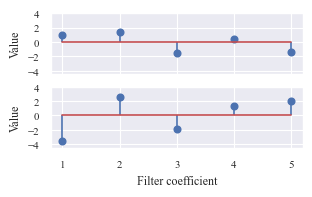

In [12]:
fig, axs = plt.subplots(2, 1, sharex="all", sharey="all", figsize=(3.25, 1.75))
axs[0].stem([x+1 for x in range(len(time3))], time3)
axs[1].stem([x+1 for x in range(len(time6))], time6)

for ax in axs.flat:
    ax.set(ylim=(-4.5, 4))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.set(xlabel='Filter coefficient', ylabel='Value')
    ax.label_outer()
plt.savefig("time_filters.pdf", bbox_inches="tight")

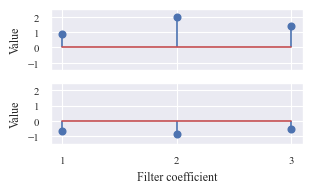

In [13]:
fig, axs = plt.subplots(2, 1, sharex="all", sharey="all", figsize=(3.25, 1.75))
axs[0].stem([x+1 for x in range(len(freq3))], freq3)
axs[1].stem([x+1 for x in range(len(freq6))], freq6)

for ax in axs.flat:
    ax.set(ylim=(-1.5, 2.5))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set(xlabel='Filter coefficient', ylabel='Value')
    ax.label_outer()
plt.savefig("freq_filters.pdf", bbox_inches="tight")

In [14]:
# Create 10 example spectrograms
ex_specs = []

def get_spectrogram(title):
    # Feature extraction parameters
    sr = 44100          #Sampling rate
    fs = 2048           #Frame size
    fps = 200           #Frames per second
    window = np.hanning #Window for STFT
    num_bands = 24      #Number of bands per octave
    fmin = 27.5         #Minimum frequency
    fmax = 16000        #Maximum frequency
    diff_max_bins = 3
    
    # File parameters
    audiofile = 'data/audio/' + title
    annotationsfile = 'data/annotations/onsets/' + re.sub('\.flac$', '.onsets', title)
    annotations = madmom.io.load_events(annotationsfile)
    
    # Get spectrogram
    signal, sr = librosa.load(audiofile, sr=sr, mono=True)
    signal /= np.max(np.abs(signal))
    signal = madmom.audio.signal.Signal(signal, sample_rate=sr, num_channels=1)
    frames = madmom.audio.stft.FramedSignal(signal, frame_size=fs, fps=fps)
    stft = madmom.audio.stft.ShortTimeFourierTransform(frames, window=window)
    y, sr = librosa.load(audiofile, mono=True)
    simplespec = madmom.audio.spectrogram.Spectrogram(stft)
    filtered_spec = madmom.audio.spectrogram.FilteredSpectrogram(simplespec, num_bands=num_bands, fmin=fmin, fmax=fmax)
    log_filtered_spec = madmom.audio.spectrogram.LogarithmicSpectrogram(filtered_spec)
    return log_filtered_spec

ex_specs.append(get_spectrogram(title='ah_test_guitar_guitar2.flac'))
ex_specs.append(get_spectrogram(title='ah_test_clarinet_44361_debudding_Clarinet_ORTF_Stereo_Pair_NT_5_s_01.flac'))
ex_specs.append(get_spectrogram(title='ah_test_guitar_guitar3.flac'))
ex_specs.append(get_spectrogram(title='ah_test_kemence_01_sultaniyghtaksim_Kemence.flac'))
ex_specs.append(get_spectrogram(title='ah_test_mixtures_classic2.flac'))
ex_specs.append(get_spectrogram(title='al_Albums-Cafe_Paradiso-16(17.0-27.0).flac'))
ex_specs.append(get_spectrogram(title='api_RM-C036.flac'))
ex_specs.append(get_spectrogram(title='ff123_BachS1007.flac'))
ex_specs.append(get_spectrogram(title='ff123_Hongroise.flac'))
ex_specs.append(get_spectrogram(title='vorbis_bassdrum.flac'))
#example_spectrogram1 = np.random.randn(1200, 80)

In [15]:
# Test if sepfirs and convolved filter are equal (result should be matrix of zeros)
freq3, time3 = split_list(filter3, 3)
combined_filter = np.multiply(np.asarray(freq3).reshape(-1, 1), np.asarray(time3).reshape(1, -1))
signal.sepfir2d(ex_specs[0], time3, freq3) - signal.convolve2d(ex_specs[0], combined_filter, mode="same", boundary="symm")

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.51075276e-11, -1.55975802e-12, -2.56494102e-12, ...,
         5.61768323e-14, -8.85705105e-14, -9.49332017e-14],
       [-7.07838128e-11,  4.65388446e-11, -1.24055810e-10, ...,
         1.21129522e-13, -2.09679032e-13,  1.00929386e-12],
       ...,
       [-3.51952276e-08, -8.51763048e-07,  1.71137494e-07, ...,
        -1.98493411e-09,  5.96073478e-09,  7.23943657e-09],
       [ 2.04351857e-07,  3.36253461e-08,  4.04092246e-07, ...,
        -2.86660917e-10,  1.39779618e-09,  9.73603238e-09],
       [ 5.35186255e-08, -7.58418333e-08,  1.42077994e-07, ...,
         2.89736694e-09, -1.76353395e-08,  3.20148300e-08]])

In [13]:
%%timeit -n 1000

for spec in ex_specs:
    signal.sepfir2d(spec, time3, freq3)

64.3 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
%%timeit -n 1000

for spec in ex_specs:
    signal.convolve2d(spec, combined_filter, mode="same", boundary="symm")

257 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
# Calculate total length of above audio files
def get_duration(audiofile):
    signal, s = librosa.load(audiofile, mono=True)
    return librosa.get_duration(y=signal, sr=s)

durations = [get_duration("data/audio/ah_test_guitar_guitar2.flac"), get_duration("data/audio/ah_test_clarinet_44361_debudding_Clarinet_ORTF_Stereo_Pair_NT_5_s_01.flac"), get_duration("data/audio/ah_test_guitar_guitar3.flac"), get_duration("data/audio/ah_test_kemence_01_sultaniyghtaksim_Kemence.flac"), get_duration("data/audio/ah_test_mixtures_classic2.flac"), get_duration("data/audio/al_Albums-Cafe_Paradiso-16(17.0-27.0).flac"), get_duration("data/audio/api_RM-C036.flac"), get_duration("data/audio/ff123_BachS1007.flac"), get_duration("data/audio/ff123_Hongroise.flac"), get_duration("data/audio/vorbis_bassdrum.flac")]
total = np.sum(durations)
print(total)

157.73569160997732


In [17]:
# Compute 2D-Filter-Kernels
A1 = np.array(np.hsplit(np.array(freq1),len(freq1)))
A2 = np.array(np.hsplit(np.array(freq2),len(freq2)))
A3 = np.array(np.hsplit(np.array(freq3),len(freq3)))
A4 = np.array(np.hsplit(np.array(freq4),len(freq4)))
A5 = np.array(np.hsplit(np.array(freq5),len(freq5)))
A6 = np.array(np.hsplit(np.array(freq6),len(freq6)))
A7 = np.array(np.hsplit(np.array(freq7),len(freq7)))
A8 = np.array(np.hsplit(np.array(freq8),len(freq8)))
B1 = np.array([time1])
B2 = np.array([time2])
B3 = np.array([time3])
B4 = np.array([time4])
B5 = np.array([time5])
B6 = np.array([time6])
B7 = np.array([time7])
B8 = np.array([time8])
list_of_2d_kernels = []
list_of_2d_kernels.append(A1.dot(B1))
list_of_2d_kernels.append(A2.dot(B2))
list_of_2d_kernels.append(A3.dot(B3))
list_of_2d_kernels.append(A4.dot(B4))
list_of_2d_kernels.append(A5.dot(B5))
list_of_2d_kernels.append(A6.dot(B6))
list_of_2d_kernels.append(A7.dot(B7))
list_of_2d_kernels.append(A8.dot(B8))

# Print Filter Kernels (matrizes)
for fil in list_of_2d_kernels:
    print(np.round(fil,2))

[[ 1.56  1.66 -2.1   0.65 -2.03]
 [ 0.73  0.78 -0.99  0.3  -0.95]
 [ 1.43  1.52 -1.92  0.6  -1.86]]
[[ 1.75  0.75 -1.26  0.46 -1.88]
 [ 1.07  0.46 -0.78  0.28 -1.16]
 [ 1.76  0.75 -1.27  0.46 -1.9 ]]
[[ 0.82  1.29 -1.38  0.34 -1.23]
 [ 1.82  2.87 -3.08  0.75 -2.73]
 [ 1.26  1.98 -2.13  0.52 -1.89]]
[[ 2.35 -1.31  0.91 -0.33 -1.84]
 [ 1.39 -0.78  0.54 -0.2  -1.09]
 [ 2.08 -1.16  0.81 -0.29 -1.63]]
[[ 0.98  0.45 -0.77  0.37 -1.18]
 [ 2.34  1.06 -1.83  0.88 -2.8 ]
 [ 1.69  0.77 -1.32  0.64 -2.03]]
[[ 2.29 -1.63  1.19 -0.8  -1.25]
 [ 2.98 -2.13  1.55 -1.04 -1.63]
 [ 1.89 -1.35  0.98 -0.66 -1.03]]
[[ 0.76  1.57  0.14 -0.94 -1.72]
 [ 0.49  1.02  0.09 -0.62 -1.13]
 [ 0.7   1.45  0.13 -0.87 -1.6 ]]
[[ 0.67  0.1  -0.27  0.19 -0.77]
 [ 1.51  0.22 -0.62  0.43 -1.74]
 [ 2.97  0.44 -1.22  0.85 -3.42]]


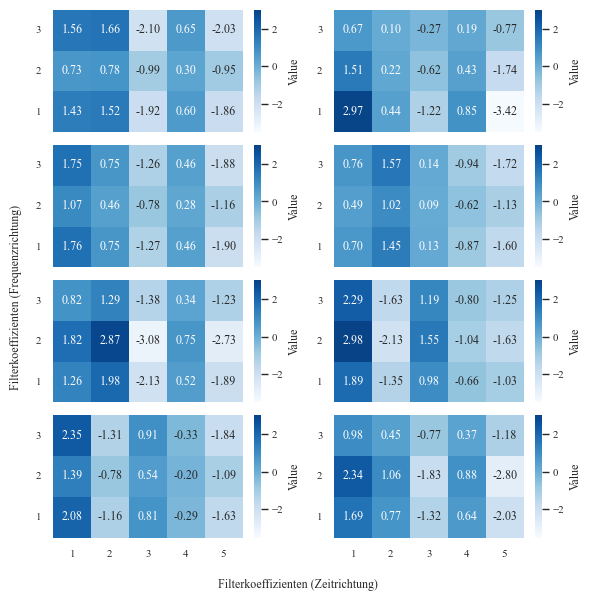

In [18]:
# Plot 2D-Filter-Kernels as Heatmaps
fig, axs = plt.subplots(4, 2, figsize=(6, 6), sharex=True, sharey=False)
#fig.suptitle("2D-Filter-Kernels", fontsize="medium")
fig.supxlabel("Filterkoeffizienten (Zeitrichtung)", fontsize="medium")
fig.supylabel("Filterkoeffizienten (Frequenzrichtung)", fontsize="medium")
i = 0
for fil in list_of_2d_kernels:
    data = {
        "1":  fil[2],
        "2":  fil[1],
        "3":  fil[0],
    }
    df = pd.DataFrame(data, index = ["1", "2", "3", "4", "5"])
   
    if i < 4:
        sns.heatmap(data=df.T, ax=axs[i,0], cmap=colors, vmin=-3.5, vmax=3., center=0., annot=True, fmt=".2f", cbar_kws={'label': 'Value'}, xticklabels=1, yticklabels=1)
        axs[i,0].invert_yaxis()
        axs[i,0].set_yticklabels(axs[i,0].get_yticklabels(), rotation=0)
    else:
        sns.heatmap(data=df.T, ax=axs[7-i,1], cmap=colors, vmin=-3.5, vmax=3., center=0., annot=True, fmt=".2f", cbar_kws={'label': 'Value'}, xticklabels=1, yticklabels=1)
        axs[7-i,1].invert_yaxis()
        axs[7-i,1].set_yticklabels(axs[7-i,1].get_yticklabels(), rotation=0)
    i = i+1
    

#plt.savefig("2D-Filter-Kernels_(5x3).png", dpi=300, bbox_inches="tight")
plt.tight_layout()

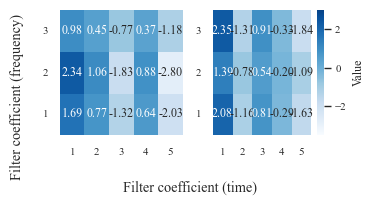

In [19]:

fold3 = [[ 0.98,  0.45, -0.77,  0.37, -1.18],
         [ 2.34,  1.06, -1.83,  0.88, -2.8 ],
         [ 1.69,  0.77, -1.32,  0.64, -2.03]]

fold6 = [[ 2.35, -1.31,  0.91, -0.33, -1.84],
         [ 1.39, -0.78,  0.54, -0.2 , -1.09],
         [ 2.08, -1.16,  0.81, -0.29, -1.63]]

fold3_data = {
    "1": fold3[2],
    "2": fold3[1],
    "3": fold3[0]
}
df3 = pd.DataFrame(fold3_data, index = ["1", "2", "3", "4", "5"])

fold6_data = {
    "1": fold6[2],
    "2": fold6[1],
    "3": fold6[0]
}
df6 = pd.DataFrame(fold6_data, index = ["1", "2", "3", "4", "5"])

# Plot 2D-Filter-Kernels as Heatmaps
fig, axs = plt.subplots(1, 2, figsize=(3.75, 2), sharex=True, sharey=False, rasterized=True)
#fig.suptitle("2D-Filter-Kernels", fontsize="medium")
fig.supxlabel("Filter coefficient (time)")#, fontsize="medium")
fig.supylabel("Filter coefficient (frequency)")#, fontsize="medium")

sns.heatmap(data=df3.T, ax=axs[0], cmap=colors, vmin=-3.5, vmax=3., center=0., annot=True, fmt=".2f", cbar_kws={'label': 'Value'}, cbar=False, xticklabels=1, yticklabels=1)
axs[0].invert_yaxis()
axs[0].set_yticklabels(axs[0].get_yticklabels(), rotation=0)
  
sns.heatmap(data=df6.T, ax=axs[1], cmap=colors, vmin=-3.5, vmax=3., center=0., annot=True, fmt=".2f", cbar_kws={'label': 'Value'}, xticklabels=1, yticklabels=1)
axs[1].invert_yaxis()
axs[1].set_yticklabels(axs[1].get_yticklabels(), rotation=0)

#plt.savefig("2D-Filter-Kernels.pdf", dpi=300, bbox_inches="tight")
plt.tight_layout()

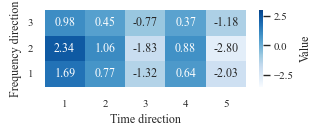

In [20]:
fig, axs = plt.subplots(figsize=(3.25, 1))
sns.heatmap(data=df3.T, ax=axs, cmap=colors, rasterized=True, vmin=-3.5, vmax=3., center=0., annot=True, fmt=".2f", cbar_kws={'label': 'Value'}, xticklabels=1, yticklabels=1)
axs.invert_yaxis()
axs.set_yticklabels(axs.get_yticklabels(), rotation=0)
axs.set_xlabel("Time direction")
axs.set_ylabel("Frequency direction")
plt.savefig("2D-Filter_Fold3.pdf", bbox_inches="tight")

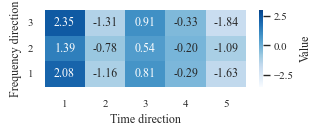

In [21]:
fig, axs = plt.subplots(figsize=(3.25, 1))
sns.heatmap(data=df6.T, ax=axs, cmap=colors, rasterized=True, vmin=-3.5, vmax=3., center=0., annot=True, fmt=".2f", cbar_kws={'label': 'Value'}, xticklabels=1, yticklabels=1)
axs.invert_yaxis()
axs.set_yticklabels(axs.get_yticklabels(), rotation=0)
axs.set_xlabel("Time direction")
axs.set_ylabel("Frequency direction")
plt.savefig("2D-Filter_Fold6.pdf", bbox_inches="tight")

In [16]:
# Perform Onset detection on all data with all given filter kernels

#import numpy as np
#import os
#import librosa
#import madmom
#from tqdm import tqdm
#from madmom.audio.signal import SignalProcessor, FramedSignalProcessor
#from madmom.audio.stft import ShortTimeFourierTransformProcessor
#from madmom.audio.spectrogram import (FilteredSpectrogramProcessor,
#                                      LogarithmicSpectrogramProcessor,
#                                      SpectrogramDifferenceProcessor)
#from madmom.features.onsets import OnsetPeakPickingProcessor
#from madmom.evaluation.onsets import OnsetEvaluation, OnsetSumEvaluation
#from madmom.processors import SequentialProcessor
#from sepfir.sep_fir_processor import SepFirProcessor
#import matplotlib.pyplot as plt
#import seaborn as sns
#
#
## Feature extraction parameters
#sr = 44100               # Sampling rate
#fs = 2048                # Frame size
#fps = 200                # Frames per second
#window = np.hanning      # Hann-Window for STFT
#num_bands = 24           # Number of bands per octave
#f_min = 27.5             # Minimum frequency
#f_max = 16000            # Maximum frequency
#diff_max_bins = 3        # Number of bins used for maximum filter
#
## Peak picking and evaluation parameters
#pre_max = 0.03      # Use pre_max seconds past information for moving maximum
#post_max = 0.03     # Use post_max seconds future information for moving maximum
#pre_avg = 0.1       # Use pre_avg seconds past information for moving average
#post_avg = 0.07     # Use post_avg seconds future information for moving average
#eval_window = 0.05  # Time window around a reference onset
#combine = 0.03      # Only report one onset within combine seconds
#delay = 0           # Report the detected onsets delay seconds delayed
#
## Instantiate Processors with above parameters
#signal_proc = SignalProcessor(sample_rate=sr, num_channels=1, norm=True)
#frames_proc = FramedSignalProcessor(frame_size=fs, fps=fps)
#stft_proc = ShortTimeFourierTransformProcessor(window=window)
#fil_spec_proc = FilteredSpectrogramProcessor(num_bands=num_bands, fmin=f_min, fmax=f_max, norm_filters=False)
#logfil_spec_proc = LogarithmicSpectrogramProcessor()
#
#preprocessor = SequentialProcessor([signal_proc, frames_proc, stft_proc, fil_spec_proc, logfil_spec_proc])
#
#def preprocessing(audiofile, sr, preprocessor):
#    # Load and normalize audio file
#    signal, sr = librosa.load(audiofile, sr=sr, mono=True)
#
#    # Calculate preprocessed spectrogram
#    log_filtered_spec = preprocessor.process(signal)
#    return log_filtered_spec
#
#def reduction_filtering(log_filtered_spec):
#    deriv = filter_proc.process(log_filtered_spec)
#    odf = deriv.sum(axis=1)
#    return odf
#
#def peak_picking(odf, peakprocessor):
#    # Peak-Picking
#    onsets = peakprocessor.process(odf)
#    return onsets
#
#def evaluation(onsets, annotationsfile):
#    # Evaluation
#    # Load annotations
#    annotations = madmom.io.load_events(annotationsfile)
#    evl = OnsetEvaluation(detections=onsets,
#                          annotations=annotations,
#                          window=eval_window,
#                          combine=combine,
#                          delay=delay)
#    return evl
#
#
#freq_filters = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8]
#time_filters = [time1, time2, time3, time4, time5, time6, time7, time8]
#df_list = []
#
#for i in range(0,8,1):
#    freq_filter = freq_filters[i]
#    time_filter = time_filters[i]
#    filter_proc = SepFirProcessor(hrow=np.array(freq_filter, dtype=np.float32),
#                                  hcol=np.array(time_filter, dtype=np.float32),
#                                  pos_diff=True)
#    peak_proc = OnsetPeakPickingProcessor(threshold=thrshlds[i],
#                                         pre_max=pre_max,
#                                         post_max=post_max,
#                                         pre_avg=pre_avg,
#                                         post_avg=post_avg,
#                                         combine=combine,
#                                         delay=delay,
#                                         fps=fps)
#    
#    
#    
#    
#    # Perform Onset Detection on all given data and print average measure
#    str_audiodir = 'data/audio' # Relative path to directory containing music files
#    str_annodir = 'data/annotations/onsets' # Relative path to directory containing .onset files
#    audiodir = os.fsencode(str_audiodir)
#    list_evals = [] # List containing all evaluation objects
#    f = open('log.txt', 'a')
#    dict_fscores = {}
#    for file in tqdm(os.listdir(audiodir), desc="Progress"):
#        filename = os.fsdecode(file)
#        audiofile = os.path.join(str_audiodir, filename)
#        filename = re.sub('\.flac$', '.onsets', filename)
#        annotationsfile = os.path.join(str_annodir, filename)
#    
#        # Pipeline:
#        spec = preprocessing(audiofile=audiofile, sr=sr, preprocessor=preprocessor)
#        odf = reduction_filtering(log_filtered_spec=spec)
#        onsets = peak_picking(odf=odf, peakprocessor=peak_proc)
#        eval_obj = evaluation(onsets=onsets, annotationsfile=annotationsfile)
#    
#        # Write evaluation measures to log file
#        dict_fscores[re.sub('\.onsets$', '', filename)] = round(eval_obj.fmeasure, 2)
#        f.write(re.sub('\.onsets$', '', filename) + ": " + str(round(eval_obj.fmeasure, 2)) + "\n")
#        #f.write("Precision: " + str(round(eval_obj.precision, 2)) + "\n")
#        #f.write("Recall:    " + str(round(eval_obj.recall, 2)) + "\n")
#        #f.write("F-Measure: " + str(round(eval_obj.fmeasure, 2)) + "\n\n")
#        list_evals.append(eval_obj)
#    f.close()
#    
#    # Evaluation over complete dataset
#    sum_eval = OnsetSumEvaluation(list_evals)
#    print(sum_eval)
#    
#    # Sort results
#    results_dict = dict(sorted(dict_fscores.items(), key=lambda x:x[1], reverse=True))
#    df = pd.DataFrame.from_dict(data=results_dict, orient='index', columns=['F-Score'])
#    df_list.append(df)
#    print(df)
#
#
#
#for i in range(8):
#    print(str(i+1) + ". Filter Kernel: ")
#    print(df_list[i].head(10))
#    print("...")
#    print(df_list[i].tail(10))
#    print("\n\n")

In [17]:
# Cost functions
import numpy as np
cost1 = [0.258, 0.25, 0.221, 0.173, 0.16, 0.156, 0.153, 0.152, 0.148, 0.148, 0.148, 0.146, 0.146, 0.146, 0.146, 0.146, 0.146, 0.146, 0.146, 0.146, 0.146, 0.146]
cost2 = [0.25, 0.222, 0.188, 0.188, 0.164, 0.161, 0.161, 0.148, 0.148, 0.148, 0.146, 0.144, 0.143, 0.143, 0.142, 0.142, 0.142, 0.142, 0.142, 0.142, 0.141, 0.141]
cost3 = [0.245, 0.20, 0.193, 0.173, 0.161, 0.149, 0.149, 0.149, 0.147, 0.146, 0.145, 0.144, 0.143, 0.143, 0.142, 0.142, 0.142, 0.142, 0.142, 0.142, 0.141, 0.141]
cost4 = [0.254, 0.208, 0.18, 0.18, 0.17, 0.158, 0.149, 0.149, 0.149, 0.149, 0.148, 0.148, 0.147, 0.147, 0.147, 0.147, 0.147, 0.147, 0.147, 0.146, 0.146, 0.146, 0.146]
cost5 = [0.256, 0.229, 0.219, 0.199, 0.175, 0.175, 0.162, 0.15, 0.15, 0.15, 0.147, 0.147, 0.145, 0.145, 0.145, 0.145, 0.145, 0.145, 0.145, 0.145, 0.144, 0.144, 0.144]
cost6 = [0.254, 0.215, 0.183, 0.181, 0.179, 0.164, 0.157, 0.156, 0.15, 0.149, 0.149, 0.148, 0.148, 0.147, 0.147, 0.147, 0.147, 0.147, 0.147, 0.147]
cost7 = [0.254, 0.18, 0.18, 0.18, 0.164, 0.154, 0.154, 0.151, 0.151, 0.151, 0.151, 0.151, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
cost8 = [0.247, 0.197, 0.178, 0.164, 0.163, 0.15,  0.149, 0.147, 0.142, 0.142, 0.14,  0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.136, 0.136, 0.136, 0.136]
len(cost1)

22

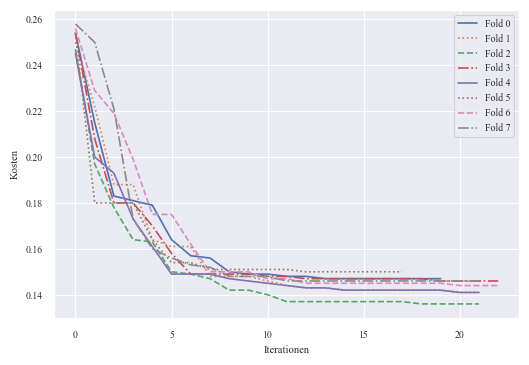

In [18]:
fig = plt.figure(figsize=(6,4))
#fig.suptitle("Time Filters for (3x5)\nMean F1: "+str(np.round(g_mean_3x5,4)), fontsize="x-large")
filter6 = sns.lineplot(data=cost6, label="Fold 0")
filter2 = sns.lineplot(data=cost2, label="Fold 1", linestyle='dotted')
filter8 = sns.lineplot(data=cost8, label="Fold 2", linestyle='dashed')
filter4 = sns.lineplot(data=cost4, label="Fold 3", linestyle='dashdot')
filter3 = sns.lineplot(data=cost3, label="Fold 4")
filter7 = sns.lineplot(data=cost7, label="Fold 5", linestyle='dotted')
filter5 = sns.lineplot(data=cost5, label="Fold 6", linestyle='dashed')
filter1 = sns.lineplot(data=cost1, label="Fold 7", linestyle='dashdot')

plt.xlabel("Iterationen")
plt.ylabel("Kosten")
#plt.title("Kostenverläufe auf allen Test-Folds")
plt.legend()
#plt.show()
#plt.savefig("Kostenverläufe.pdf", bbox_inches="tight")


In [23]:
# Perform Onset detection for each filter kernel on its corresponding test fold only!
import numpy as np
import os
import re
import librosa
import madmom
from tqdm import tqdm
from madmom.audio.signal import SignalProcessor, FramedSignalProcessor
from madmom.audio.stft import ShortTimeFourierTransformProcessor
from madmom.audio.spectrogram import (FilteredSpectrogramProcessor,
                                      LogarithmicSpectrogramProcessor,
                                      SpectrogramDifferenceProcessor)
from madmom.features.onsets import OnsetPeakPickingProcessor
from madmom.evaluation.onsets import OnsetEvaluation, OnsetSumEvaluation, OnsetMeanEvaluation
from madmom.processors import SequentialProcessor
from sepfir.sep_fir_processor import SepFirProcessor, SepFirProcessor2d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time


# Feature extraction parameters
sr = 44100               # Sampling rate
fs = 2048                # Frame size
fps = 200                # Frames per second
window = np.hanning      # Hann-Window for STFT
num_bands = 24           # Number of bands per octave
f_min = 27.5             # Minimum frequency
f_max = 16000            # Maximum frequency

# Peak picking and evaluation parameters
pre_max = 0.03      # Use pre_max seconds past information for moving maximum
post_max = 0.03     # Use post_max seconds future information for moving maximum
pre_avg = 0.1       # Use pre_avg seconds past information for moving average
post_avg = 0.07     # Use post_avg seconds future information for moving average
eval_window = 0.05  # Time window around a reference onset
combine = 0.03      # Only report one onset within combine seconds
delay = 0           # Report the detected onsets delay seconds delayed

# Instantiate Processors with above parameters
signal_proc = SignalProcessor(sample_rate=sr, num_channels=1, norm=True)
frames_proc = FramedSignalProcessor(frame_size=fs, fps=fps)
stft_proc = ShortTimeFourierTransformProcessor(window=window)
fil_spec_proc = FilteredSpectrogramProcessor(num_bands=num_bands, fmin=f_min, fmax=f_max, norm_filters=False)
logfil_spec_proc = LogarithmicSpectrogramProcessor()

preprocessor = SequentialProcessor([signal_proc, frames_proc, stft_proc, fil_spec_proc, logfil_spec_proc])

total_time = []

def preprocessing(audiofile, sr, preprocessor):
    # Load and normalize audio file
    signal, sr = librosa.load(audiofile, sr=sr, mono=True)

    # Calculate preprocessed spectrogram
    log_filtered_spec = preprocessor.process(signal)
    return log_filtered_spec

def reduction_filtering(log_filtered_spec):
    t1 = time()
    deriv = filter_proc.process(log_filtered_spec)
    #deriv = filter_proc_2d.process(log_filtered_spec)
    odf = deriv.sum(axis=1)
    t2 = time()
    t = t2 - t1
    total_time.append(t)
    return odf

def peak_picking(odf, peakprocessor):
    # Peak-Picking
    onsets = peakprocessor.process(odf)
    return onsets

def evaluation(onsets, annotationsfile):
    # Evaluation
    # Load annotations
    annotations = madmom.io.load_events(annotationsfile)
    evl = OnsetEvaluation(detections=onsets,
                          annotations=annotations,
                          window=eval_window,
                          combine=combine,
                          delay=delay)
    return evl

def get_filenames_from_fold(fold):
    path_to_folds = "data/splits"
    with open(os.path.join(path_to_folds, fold)) as fd:
            track_names = [line.rstrip() for line in fd]  # List containing all track names for a specific fold
            fd.close()
            return track_names

freq_filters = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8]
time_filters = [time1, time2, time3, time4, time5, time6, time7, time8]
fold0 = get_filenames_from_fold('8-fold_cv_random_0.fold')
fold1 = get_filenames_from_fold('8-fold_cv_random_1.fold')
fold2 = get_filenames_from_fold('8-fold_cv_random_2.fold')
fold3 = get_filenames_from_fold('8-fold_cv_random_3.fold')
fold4 = get_filenames_from_fold('8-fold_cv_random_4.fold')
fold5 = get_filenames_from_fold('8-fold_cv_random_5.fold')
fold6 = get_filenames_from_fold('8-fold_cv_random_6.fold')
fold7 = get_filenames_from_fold('8-fold_cv_random_7.fold')

test_folds = [ fold7, fold1, fold4, fold3, fold6, fold0, fold5, fold2 ] # Sort folds in correct order!!!
df_list = []
dict_fscores = []
total_sum_evals = []
total_mean_evals = []
# Iterate over all filter kernels and their corresponding test folds
for i in range(0,8,1):
    freq_filter = freq_filters[i]
    time_filter = time_filters[i]
    filter_proc = SepFirProcessor(hrow=np.array(freq_filter, dtype=np.float32),
                                  hcol=np.array(time_filter, dtype=np.float32),
                                  pos_diff=True)
    filter_proc_2d = SepFirProcessor2d(hrow=np.array(freq_filter, dtype=np.float32),
                                  hcol=np.array(time_filter, dtype=np.float32),
                                  pos_diff=True)
    peak_proc = OnsetPeakPickingProcessor(threshold=thrshlds[i],
                                      pre_max=pre_max,
                                      post_max=post_max,
                                      pre_avg=pre_avg,
                                      post_avg=post_avg,
                                      combine=combine,
                                      delay=delay,
                                      fps=fps)
    track_names = test_folds[i]
    list_evals = []
    
    dict_fscores = {}
    # Iterate over all tracks in this fold and perform Onset detection with evaluations
    for file in tqdm(track_names, desc="Processing..."):
        str_audiodir = 'data/audio'
        str_annodir = 'data/annotations/onsets'
        audiodir = os.fsencode(str_audiodir)
        refdir = os.fsencode(str_annodir)
        audiofile = os.path.join(str_audiodir, file+".flac")
        annotationsfile = os.path.join(str_annodir, file+".onsets")
        
        # Pipeline:
        spec = preprocessing(audiofile=audiofile, sr=sr, preprocessor=preprocessor)
        odf = reduction_filtering(log_filtered_spec=spec)
        onsets = peak_picking(odf=odf, peakprocessor=peak_proc)
        eval_obj = evaluation(onsets=onsets, annotationsfile=annotationsfile)
        
        # Write evaluation measures to log file
        dict_fscores[re.sub('\.onsets$', '', file)] = round(eval_obj.fmeasure, 2)
        #f.write(re.sub('\.onsets$', '', filename) + ": " + str(round(eval_obj.fmeasure, 2)) + "\n")
        #f.write("Precision: " + str(round(eval_obj.precision, 2)) + "\n")
        #f.write("Recall:    " + str(round(eval_obj.recall, 2)) + "\n")
        #f.write("F-Measure: " + str(round(eval_obj.fmeasure, 2)) + "\n\n")
        list_evals.append(eval_obj)
        
    # Evaluation over complete dataset
    sum_eval = OnsetSumEvaluation(list_evals)
    mean_eval = OnsetMeanEvaluation(list_evals)
    print("Sum Eval: "+str(sum_eval))
    print("Mean Eval: "+str(mean_eval))
    print("Frequency-Filter: " + str(freq_filter))
    print("Time-Filter: " + str(time_filter))
    print("Threshold: " + str(thrshlds[i]))
    total_sum_evals.append(sum_eval)
    total_mean_evals.append(mean_eval)
        
    # Sort results
    results_dict = dict(sorted(dict_fscores.items(), key=lambda x:x[1], reverse=True))
    df = pd.DataFrame.from_dict(data=results_dict, orient='index', columns=['F-Score'])
    df_list.append(df)
print("Total time: " + str(np.sum(total_time)))   

Processing...: 100%|███████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.57it/s]


Sum Eval: sum for 40 files
  Onsets:  3559 TP:  1133 FP:   920 FN:  2426 Precision: 0.552 Recall: 0.318 F-measure: 0.404 mean:  11.6 ms std:  29.2 ms
Mean Eval: mean for 40 files
  Onsets: 88.97 TP: 28.32 FP: 23.00 FN: 60.65 Precision: 0.508 Recall: 0.326 F-measure: 0.373 mean:  12.3 ms std:  24.3 ms
Frequency-Filter: [1.4514875, 0.67962813, 1.3267739]
Time-Filter: [1.076459, 1.1447549, -1.4494876, 0.4485518, -1.3983144]
Threshold: 12.780292


Processing...: 100%|███████████████████████████████████████████████████████████████████| 41/41 [00:08<00:00,  4.63it/s]


Sum Eval: sum for 41 files
  Onsets:  3220 TP:   789 FP:   650 FN:  2431 Precision: 0.548 Recall: 0.245 F-measure: 0.339 mean:  10.8 ms std:  27.0 ms
Mean Eval: mean for 41 files
  Onsets: 78.54 TP: 19.24 FP: 15.85 FN: 59.29 Precision: 0.584 Recall: 0.340 F-measure: 0.401 mean:  10.9 ms std:  21.5 ms
Frequency-Filter: [0.4388686, 0.26955575, 0.44204888]
Time-Filter: [3.9786017, 1.6983291, -2.8763483, 1.0405272, -4.2872205]
Threshold: 13.682718


Processing...: 100%|███████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.77it/s]


Sum Eval: sum for 40 files
  Onsets:  2542 TP:   799 FP:   786 FN:  1743 Precision: 0.504 Recall: 0.314 F-measure: 0.387 mean:   9.1 ms std:  30.5 ms
Mean Eval: mean for 40 files
  Onsets: 63.55 TP: 19.98 FP: 19.65 FN: 43.58 Precision: 0.491 Recall: 0.314 F-measure: 0.372 mean:  11.7 ms std:  23.2 ms
Frequency-Filter: [0.90074927, 2.0068014, 1.384222]
Time-Filter: [0.90909255, 1.429568, -1.5369593, 0.37383863, -1.3617892]
Threshold: 15.807245


Processing...: 100%|███████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.67it/s]


Sum Eval: sum for 40 files
  Onsets:  2995 TP:  1065 FP:   643 FN:  1930 Precision: 0.624 Recall: 0.356 F-measure: 0.453 mean:  12.1 ms std:  25.4 ms
Mean Eval: mean for 40 files
  Onsets: 74.88 TP: 26.62 FP: 16.07 FN: 48.25 Precision: 0.552 Recall: 0.343 F-measure: 0.407 mean:  14.1 ms std:  19.8 ms
Frequency-Filter: [-0.5914803, -0.35116303, -0.5254847]
Time-Filter: [-3.965828, 2.2166693, -1.5370568, 0.5555174, 3.1105368]
Threshold: 11.309557


Processing...: 100%|███████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.90it/s]


Sum Eval: sum for 40 files
  Onsets:  3915 TP:  1114 FP:   984 FN:  2801 Precision: 0.531 Recall: 0.285 F-measure: 0.371 mean:   5.9 ms std:  30.0 ms
Mean Eval: mean for 40 files
  Onsets: 97.88 TP: 27.85 FP: 24.60 FN: 70.03 Precision: 0.513 Recall: 0.320 F-measure: 0.374 mean:   6.4 ms std:  25.7 ms
Frequency-Filter: [0.45256743, 1.0780698, 0.77992415]
Time-Filter: [2.171062, 0.98768353, -1.6954808, 0.8178946, -2.5986037]
Threshold: 14.437158


Processing...: 100%|███████████████████████████████████████████████████████████████████| 41/41 [00:07<00:00,  5.18it/s]


Sum Eval: sum for 41 files
  Onsets:  2696 TP:   878 FP:   893 FN:  1818 Precision: 0.496 Recall: 0.326 F-measure: 0.393 mean:  12.2 ms std:  28.7 ms
Mean Eval: mean for 41 files
  Onsets: 65.76 TP: 21.41 FP: 21.78 FN: 44.34 Precision: 0.536 Recall: 0.352 F-measure: 0.412 mean:  15.0 ms std:  21.6 ms
Frequency-Filter: [-0.6369055, -0.83030605, -0.52570707]
Time-Filter: [-3.5917513, 2.562756, -1.8627614, 1.2491975, 1.9648478]
Threshold: 12.008744


Processing...: 100%|███████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.93it/s]


Sum Eval: sum for 40 files
  Onsets:  2920 TP:   948 FP:   575 FN:  1972 Precision: 0.622 Recall: 0.325 F-measure: 0.427 mean:  14.9 ms std:  24.1 ms
Mean Eval: mean for 40 files
  Onsets: 73.00 TP: 23.70 FP: 14.38 FN: 49.30 Precision: 0.539 Recall: 0.318 F-measure: 0.385 mean:  17.4 ms std:  21.4 ms
Frequency-Filter: [-0.34577784, -0.22609143, -0.32085896]
Time-Filter: [-2.1855235, -4.527265, -0.41339868, 2.7202175, 4.980925]
Threshold: 14.5411005


Processing...: 100%|███████████████████████████████████████████████████████████████████| 39/39 [00:08<00:00,  4.71it/s]

Sum Eval: sum for 39 files
  Onsets:  3980 TP:   923 FP:   666 FN:  3057 Precision: 0.581 Recall: 0.232 F-measure: 0.331 mean:  11.9 ms std:  29.4 ms
Mean Eval: mean for 39 files
  Onsets: 102.05 TP: 23.67 FP: 17.08 FN: 78.38 Precision: 0.540 Recall: 0.280 F-measure: 0.349 mean:  10.3 ms std:  25.4 ms
Frequency-Filter: [0.7999404, 1.8004252, 3.543838]
Time-Filter: [0.8375645, 0.12475213, -0.34295174, 0.23983702, -0.9645398]
Threshold: 14.424377
Total time: 7.116091966629028


In [21]:
# Total F-measure, Precision and Recall over all folds
print(OnsetSumEvaluation(total_sum_evals))
print(OnsetMeanEvaluation(total_mean_evals))

sum for 8 files
  Onsets: 25827 TP: 21624 FP:  3152 FN:  4203 Precision: 0.873 Recall: 0.837 F-measure: 0.855 mean: -11.1 ms std:  10.8 ms
mean for 8 files
  Onsets: 80.58 TP: 67.43 FP:  9.82 FN: 13.15 Precision: 0.850 Recall: 0.861 F-measure: 0.844 mean: -11.6 ms std:   9.4 ms


In [8]:
from time import time, sleep


t1 = time()
sleep(10)
t2 = time()
t2 - t1

10.012269496917725

In [21]:
for i in range(8):
    print(str(i+1) + ". Filter Kernel: ")
    print(df_list[i].head(21))
    print("...")
    print(df_list[i].tail(21))
    print("\n\n")

1. Filter Kernel: 
                                                    F-Score
ah_test_trumpet_Miles_DAVIS__Michel_LEGRAND_DIN...     1.00
jpb_Jaillet64                                          1.00
SoundCheck2_65_Instrumental_Acoustic_steel_stru...     0.98
ff123_rushing                                          0.97
jpb_arab60s                                            0.97
ff123_41_30sec                                         0.95
jpb_jaxx                                               0.95
jpb_violin                                             0.95
al_Media-103611(8.2-18.2)                              0.94
al_Albums-Latin_Jam5-01(7.9-17.9)                      0.93
api_2-artificial                                       0.93
api_8-ambrielb                                         0.93
al_Media-105905(7.8-17.8)                              0.93
ah_development_violin_violin2                          0.92
sb_Media-103302(15.0-25.0)                             0.92
ah_test_clarinet_my_c

In [3]:
# Compute total lenght of complete dataset

import os
from tqdm import tqdm
import datetime
import librosa

str_audiodir = 'data/audio'
audiodir = os.fsencode(str_audiodir)

def time_converter(seconds):
    return str(datetime.timedelta(seconds = seconds))


def get_duration(audiofile):
    signal, s = librosa.load(audiofile, mono=True)
    return librosa.get_duration(y=signal, sr=s)


durations_list = []
for file in tqdm(os.listdir(audiodir)):
    filename = os.fsdecode(file)
    audiofile = os.path.join(str_audiodir, filename)
    durations_list.append(get_duration(audiofile=audiofile))

print(str(len(durations_list)) + " files.")
#print("Total time: " + str(time_converter(sum(durations_list))))
print("Total time: " + str(sum(durations_list)/60))

100%|████████████████████████████████████████████████████████████████████████████████| 321/321 [00:05<00:00, 55.98it/s]

321 files.
Total time: 101.8384761904763


In [27]:
# Duration of global optimization runs
import datetime
import numpy as np

duration_1x1   = datetime.datetime.strptime("2:33:18", "%H:%M:%S")
duration_3x1   = datetime.datetime.strptime("3:11:00", "%H:%M:%S")
duration_5x1   = datetime.datetime.strptime("2:52:57", "%H:%M:%S")
duration_7x1   = datetime.datetime.strptime("3:35:51", "%H:%M:%S")
duration_9x1   = datetime.datetime.strptime("2:59:53", "%H:%M:%S")
duration_11x1  = datetime.datetime.strptime("3:45:19", "%H:%M:%S")

duration_1x3   = datetime.datetime.strptime("3:43:10", "%H:%M:%S")
duration_3x3   = datetime.datetime.strptime("4:32:09", "%H:%M:%S")
duration_5x3   = datetime.datetime.strptime("5:44:55", "%H:%M:%S")
duration_7x3   = datetime.datetime.strptime("6:00:43", "%H:%M:%S")
duration_9x3   = datetime.datetime.strptime("6:27:39", "%H:%M:%S")
duration_11x3  = datetime.datetime.strptime("6:32:31", "%H:%M:%S")

duration_1x5   = datetime.datetime.strptime("3:57:37", "%H:%M:%S")
duration_3x5   = datetime.datetime.strptime("9:56:42", "%H:%M:%S")
duration_5x5   = datetime.datetime.strptime("6:23:43", "%H:%M:%S")
duration_7x5   = datetime.datetime.strptime("7:42:16", "%H:%M:%S")
duration_9x5   = datetime.datetime.strptime("7:37:55", "%H:%M:%S")
duration_11x5  = datetime.datetime.strptime("9:14:31", "%H:%M:%S")

duration_1x7   = datetime.datetime.strptime("4:37:16", "%H:%M:%S")
duration_3x7   = datetime.datetime.strptime("5:29:43", "%H:%M:%S")
duration_5x7   = datetime.datetime.strptime("7:09:37", "%H:%M:%S")
duration_7x7   = datetime.datetime.strptime("8:14:00", "%H:%M:%S")
duration_9x7   = datetime.datetime.strptime("10:33:11", "%H:%M:%S")
duration_11x7  = datetime.datetime.strptime("11:28:19", "%H:%M:%S")

duration_1x9   = datetime.datetime.strptime("5:00:42", "%H:%M:%S")
duration_3x9   = datetime.datetime.strptime("6:15:31", "%H:%M:%S")
duration_5x9   = datetime.datetime.strptime("8:09:03", "%H:%M:%S")
duration_7x9   = datetime.datetime.strptime("9:49:35", "%H:%M:%S")
duration_9x9   = datetime.datetime.strptime("12:01:30", "%H:%M:%S")
duration_11x9  = datetime.datetime.strptime("12:18:10", "%H:%M:%S")

duration_1x11  = datetime.datetime.strptime("5:45:59", "%H:%M:%S")
duration_3x11  = datetime.datetime.strptime("7:37:26", "%H:%M:%S")
duration_5x11  = datetime.datetime.strptime("9:43:14", "%H:%M:%S")
duration_7x11  = datetime.datetime.strptime("12:03:40", "%H:%M:%S")
duration_9x11  = datetime.datetime.strptime("13:41:23", "%H:%M:%S")
duration_11x11 = datetime.datetime.strptime("13:37:40", "%H:%M:%S")

duration_1x13  = datetime.datetime.strptime("6:27:09", "%H:%M:%S")
duration_3x13  = datetime.datetime.strptime("8:05:50", "%H:%M:%S")
duration_5x13  = datetime.datetime.strptime("12:01:07", "%H:%M:%S")
duration_7x13  = datetime.datetime.strptime("13:00:39", "%H:%M:%S")
duration_9x13  = datetime.datetime.strptime("16:00:59", "%H:%M:%S")
duration_11x13 = datetime.datetime.strptime("18:04:13", "%H:%M:%S")

In [33]:
def to_seconds(datetime_object):
    a_timedelta = datetime_object - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return(seconds)
durations_list = []
durations_list.append(to_seconds(duration_1x1))
durations_list.append(to_seconds(duration_3x1)) 
durations_list.append(to_seconds(duration_5x1))  
durations_list.append(to_seconds(duration_7x1))  
durations_list.append(to_seconds(duration_9x1))  
durations_list.append(to_seconds(duration_11x1)) 
durations_list.append(to_seconds(duration_1x3)) 
durations_list.append(to_seconds(duration_3x3)) 
durations_list.append(to_seconds(duration_5x3)) 
durations_list.append(to_seconds(duration_7x3)) 
durations_list.append(to_seconds(duration_9x3)) 
durations_list.append(to_seconds(duration_11x3))
durations_list.append(to_seconds(duration_1x5))  
durations_list.append(to_seconds(duration_3x5))  
durations_list.append(to_seconds(duration_5x5))  
durations_list.append(to_seconds(duration_7x5))  
durations_list.append(to_seconds(duration_9x5))  
durations_list.append(to_seconds(duration_11x5))
durations_list.append(to_seconds(duration_1x7))  
durations_list.append(to_seconds(duration_3x7))  
durations_list.append(to_seconds(duration_5x7))  
durations_list.append(to_seconds(duration_7x7))  
durations_list.append(to_seconds(duration_9x7))  
durations_list.append(to_seconds(duration_11x7)) 
durations_list.append(to_seconds(duration_1x9))  
durations_list.append(to_seconds(duration_3x9))  
durations_list.append(to_seconds(duration_5x9))  
durations_list.append(to_seconds(duration_7x9))  
durations_list.append(to_seconds(duration_9x9))  
durations_list.append(to_seconds(duration_11x9)) 
durations_list.append(to_seconds(duration_1x11)) 
durations_list.append(to_seconds(duration_3x11)) 
durations_list.append(to_seconds(duration_5x11)) 
durations_list.append(to_seconds(duration_7x11)) 
durations_list.append(to_seconds(duration_9x11)) 
durations_list.append(to_seconds(duration_11x11))
durations_list.append(to_seconds(duration_1x13)) 
durations_list.append(to_seconds(duration_3x13)) 
durations_list.append(to_seconds(duration_5x13)) 
durations_list.append(to_seconds(duration_7x13)) 
durations_list.append(to_seconds(duration_9x13)) 
durations_list.append(to_seconds(duration_11x13))

mean = np.mean(durations_list)
std = np.std(durations_list)

seconds = mean % (24 * 3600)
hour = seconds // 3600
seconds %= 3600
minutes = seconds // 60
seconds %= 60

print("Mean duration: %d:%02d:%02d" % (hour, minutes, seconds))

Mean duration: 7:57:20


In [21]:
# Filter types A (große Zeit-, kleine Freq.Koeffizienten) and B (kleine Zeit-, große Freq.Koeffizienten) mean F-Scores

a_scores = [0.841, 0.873, 0.872, 0.886]
b_scores = [0.869, 0.832, 0.859, 0.810]

a_mean = np.mean(a_scores)
b_mean = np.mean(b_scores)
print(a_mean)
print(b_mean)

0.868
0.8425


In [25]:
# Total F-measure, Precision and Recall over all folds
print(OnsetSumEvaluation(total_sum_evals))

sum for 8 files
  Onsets: 25827 TP: 21479 FP:  2911 FN:  4348 Precision: 0.881 Recall: 0.832 F-measure: 0.855 mean:  -6.4 ms std:  10.3 ms


[11.875, 18.875, 20.5, 20.25, 21.375, 24.125, 22.25]


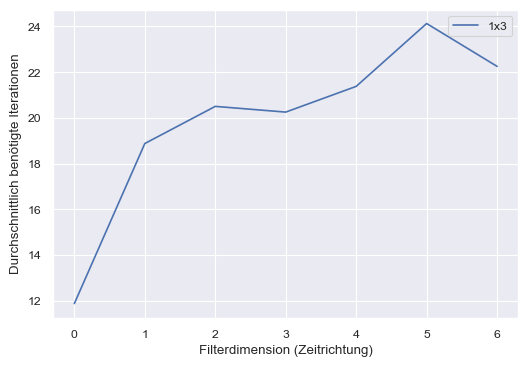

In [22]:
i3x1 = np.mean([12, 11, 11, 11, 13, 12, 12, 13])
i3x3 = np.mean([16, 20, 18, 21, 17, 21, 19, 19])
i3x5 = np.mean([21, 21, 21, 22, 22, 19, 17, 21])
i3x7 = np.mean([18, 21, 19, 15, 25, 21, 22, 21])
i3x9 = np.mean([23, 23, 19, 22, 20, 19, 22, 23])
i3x11 = np.mean([25, 30, 24, 23, 21, 21, 23, 26])
i3x13 = np.mean([23, 26, 17, 17, 23, 23, 25, 24])
verlauf = [i3x1, i3x3, i3x5, i3x7, i3x9, i3x11, i3x13]
print(verlauf)
fig = plt.figure(figsize=(6,4))
filter6 = sns.lineplot(data=verlauf, label="1x3")

plt.xlabel("Filterdimension (Zeitrichtung)")
plt.ylabel("Durchschnittlich benötigte Iterationen")
#plt.title("Kostenverläufe auf allen Test-Folds")
plt.legend()
#plt.show()
#plt.savefig("Kostenverläufe.pdf", bbox_inches="tight")